In [12]:
!pip install torch matplotlib

import torch
import matplotlib.pyplot as plt
import numpy as np

#Plotting the Function and Its Tangent Lines with Respect to 𝑥, Using PyTorch and Matplotlib



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
# Define the tensor for x with gradient tracking enabled
x = torch.tensor(3.0, requires_grad=True) 
# Track the x values to observe the rate of change of z with respect to x

In [75]:
# Define the tensor for y with gradient tracking enabled
y = torch.tensor(0.0, requires_grad=True)
# Track the y values to observe the rate of change in z with respect to y

In [76]:
# Define the function z = f(x, y)
def f(my_x, my_y):
    return my_x**2 - my_y**2

In [77]:
# Evaluate the function for plotting
f(x, y)

tensor(9., grad_fn=<SubBackward0>)

In [78]:
# Generate x values ranging from -3 to 3, with 1000 subdivisions
From_3to_3_Xvalues = np.linspace(-3, 3, 1000)
zs_wrt_x = f(From_3to_3_Xvalues, 0)  # Evaluate the function at y = 0

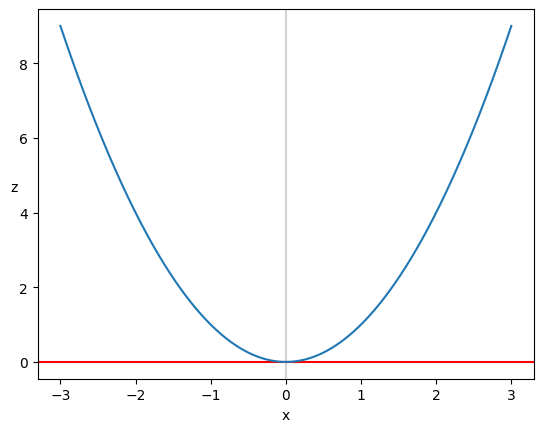

In [79]:
# Create a plot
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')  # Draw a vertical line at x=0
plt.axhline(y=0.0, color='red')  # Draw a horizontal line at y=0

plt.xlabel('x')  # Label for x-axis
plt.ylabel('z', rotation=0)  # Label for y-axis
# Plot the function values
_=ax.plot(From_3to_3_Xvalues, zs_wrt_x)

In [80]:
# Define the derivative function dz/dx
def dz_dx(my_x, my_y):
    return 2 * my_x  # Return the derivative of z with respect to x

In [81]:
# Evaluate the derivative for the defined x and y
dz_dx(x, y)

tensor(6., grad_fn=<MulBackward0>)

In [82]:
# Define sample x values to plot tangents
x_sample = [-2, -3, -1, 2, 1, 0]
# Define corresponding colors for each sample point
colors = ['gray', 'black', 'red', 'orange', 'green', 'blue']

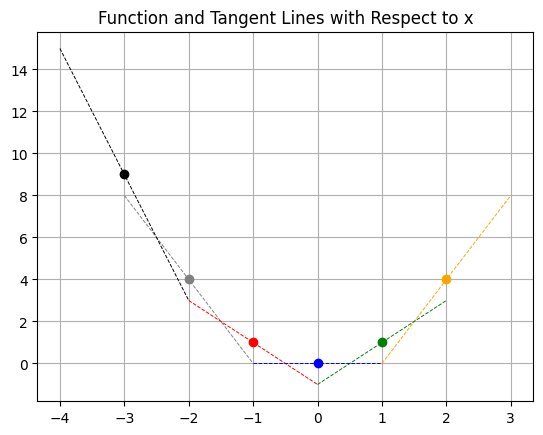

In [83]:
# Define a function to plot points and tangent lines with respect to x
def point_and_tangent_wrt_x(x_value, y_value, col):
    my_z = f(torch.tensor(x_value), torch.tensor(y_value)).detach().numpy()  # Calculate z for the given x and y
    
    # Compute the slope (derivative) of the tangent line
    fprime = dz_dx(torch.tensor(x_value), torch.tensor(y_value)).detach().numpy()
    tangent_m = fprime  # Slope of the tangent line
    tangent_b = my_z - tangent_m * x_value  # y-intercept of the tangent line
    
    # Define a range of x values for plotting the tangent line
    my_xs = np.linspace(x_value - 1, x_value + 1, 100)
    tangent_line = tangent_m * my_xs + tangent_b  # Calculate the tangent line values
    
    # Plot the sample point and the tangent line
    plt.scatter(x_value, my_z, c=col, zorder=3)  # Plot the point
    plt.plot(my_xs, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3)  # Plot the tangent line

# Plot tangent lines for all sample x values
for x_val, col in zip(x_sample, colors):
    point_and_tangent_wrt_x(x_val, y.item(), col)  # Call the function for each sample

# Show the plot with a title and grid
plt.title('Function and Tangent Lines with Respect to x')
plt.grid()